In [2]:
import sqlite3
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

conn = sqlite3.connect('db.sqlite3')
data = conn.execute("""
with data_time as (
select avg(value) as attendances, commune_id, date(data.year || '-' || (
    case data.cohort
        when 'Enero' then '01'
        when 'Febrero' then '02'
        when 'Marzo' then '03'
        when 'Abril' then '04'
        when 'Mayo' then '05'
        when 'Junio' then '06'
        when 'Julio' then '07'
        when 'Agosto' then '08'
        when 'Septiembre' then '09'
        when 'Octubre' then '10'
        when 'Noviembre' then '11'
        when 'Diciembre' then '12'
        else 1
    end) || '-01') as date
from data
join report on data.report_id = report.id
where report.description = 'Ingresos Programa de Salud Mental por mes y año'
group by date, commune_id
),
contaminant_time as (
select avg(concentration) as concentration, commune_id, date(datetime, 'unixepoch', 'start of month') as date
from contaminant
where contaminant.contaminant = 'SO2'
group by date, commune_id
)
select commune.name, contaminant_time.concentration, data_time.date, attendances from data_time
join contaminant_time on data_time.date = contaminant_time.date and data_time.commune_id = contaminant_time.commune_id
join commune on data_time.commune_id = commune.id
""").fetchall()

# drop unixtimestamp
data = pandas.DataFrame(data, columns=['commune', 'concentration', 'date', 'attendances'])
data.index = pandas.to_datetime(data['date'])
data = data.drop(columns=['date'])

# scale
scaler = MinMaxScaler()
data[['concentration']] = scaler.fit_transform(data[['concentration']])
data[['attendances']] = scaler.fit_transform(data[['attendances']])

data

,commune,concentration,attendances
date,,,
2018-01-01,LA CISTERNA,0.438887,0.444234
2018-01-01,PENALOLEN,0.092656,0.504608
2018-01-01,PUENTE ALTO,0.555586,0.882561
2018-01-01,TALAGANTE,0.008522,0.170762
2018-02-01,LA CISTERNA,0.057556,0.263390
...,...,...,...
2024-04-01,LA CISTERNA,0.654590,0.587587
2024-04-01,PENALOLEN,0.591236,0.415564
2024-05-01,PENALOLEN,0.688435,0.384026


Mean Squared Error: 0.006133224037982206
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   60
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  35.070
Date:                Thu, 16 Oct 2025   AIC                            -60.141
Time:                        23:29:41   BIC                            -49.753
Sample:                             0   HQIC                           -56.086
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5054      0.543     -0.930      0.352      -1.571       0.560
ar.L2         -0.3224      0.358     -0.901      0.368      -1.024       0.379
ar.L3      

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: Val

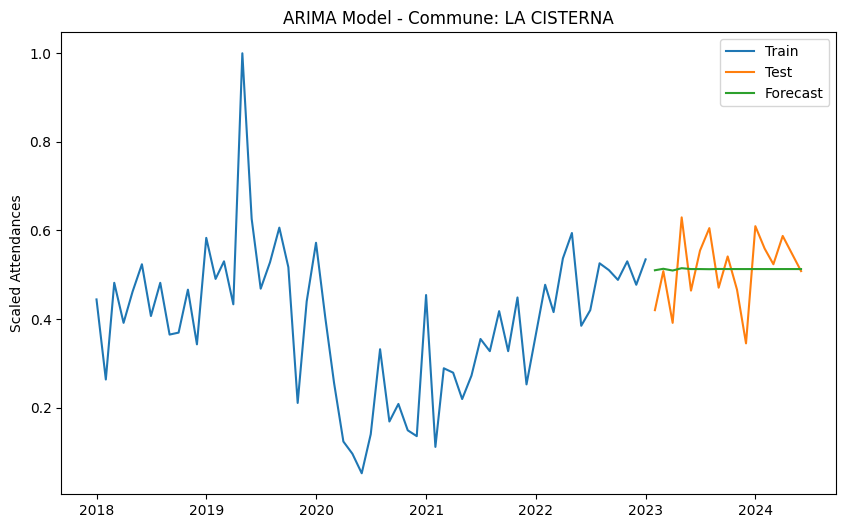

Mean Squared Error: 0.006154511349575706
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   60
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  35.127
Date:                Thu, 16 Oct 2025   AIC                            -58.253
Time:                        23:29:41   BIC                            -45.788
Sample:                             0   HQIC                           -53.387
                                 - 60                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
concentration     0.0349      0.155      0.225      0.822      -0.269       0.339
ar.L1            -0.5022      0.548     -0.917      0.359      -1.575       0.571

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: Val

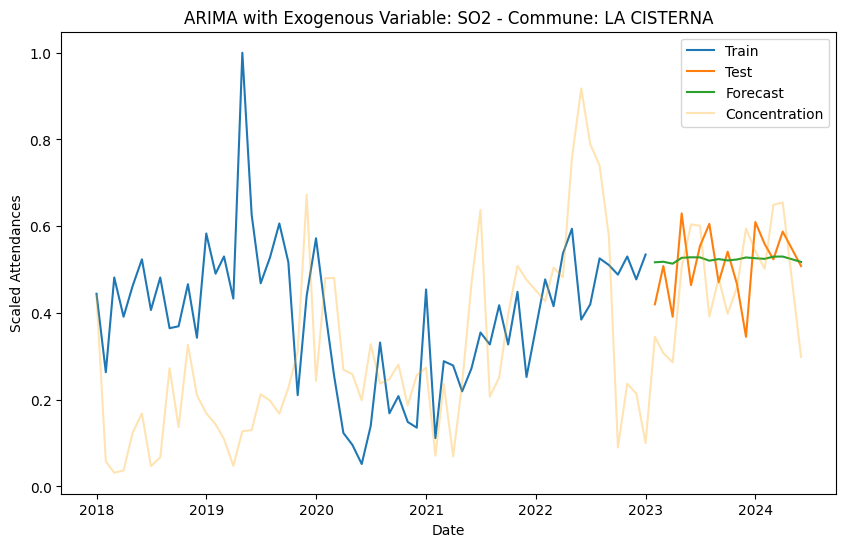

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 0.02503575028598037
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   53
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  36.009
Date:                Thu, 16 Oct 2025   AIC                            -62.017
Time:                        23:29:42   BIC                            -52.261
Sample:                             0   HQIC                           -58.277
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6488      0.231      2.812      0.005       0.197       1.101
ar.L2          0.1006      0.198      0.509      0.611      -0.287       0.488
ar.L3       

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No su

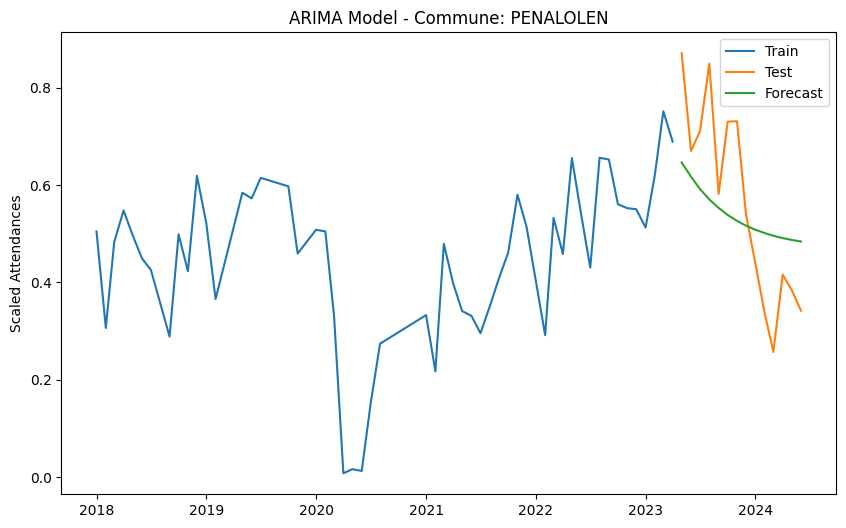

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: Val

Mean Squared Error: 0.024961301740668084
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   53
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  36.010
Date:                Thu, 16 Oct 2025   AIC                            -60.019
Time:                        23:29:42   BIC                            -48.312
Sample:                             0   HQIC                           -55.531
                                 - 53                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
concentration     0.0036      0.107      0.033      0.973      -0.207       0.214
ar.L1             0.6485      0.242      2.684      0.007       0.175       1.122

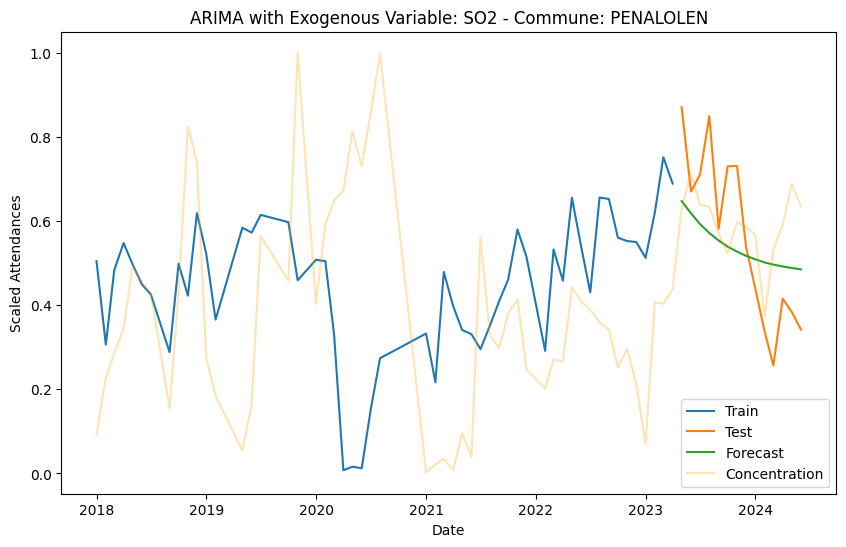

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: Val

Mean Squared Error: 0.008867255478775723
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   36
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  20.602
Date:                Thu, 16 Oct 2025   AIC                            -31.203
Time:                        23:29:42   BIC                            -23.427
Sample:                             0   HQIC                           -28.519
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1213      0.545      0.223      0.824      -0.947       1.190
ar.L2          0.0222      0.378      0.059      0.953      -0.718       0.762
ar.L3      

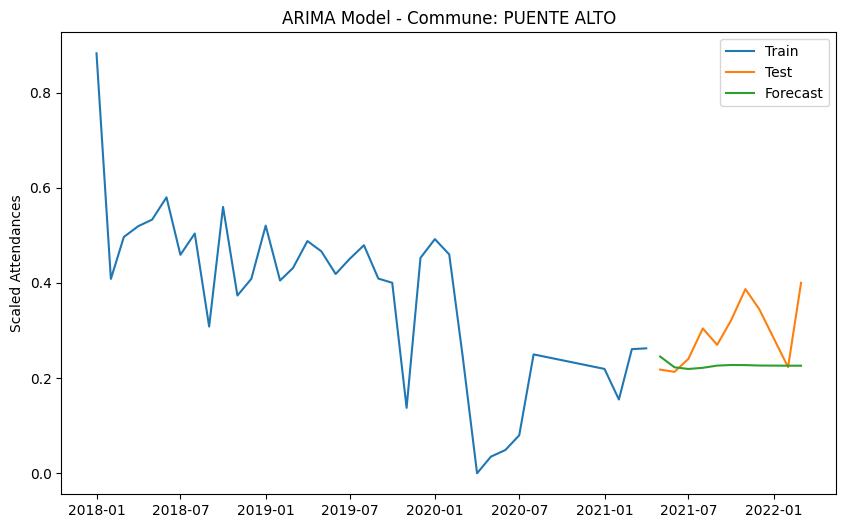

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: Val

Mean Squared Error: 0.009531864374758886
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   36
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  21.476
Date:                Thu, 16 Oct 2025   AIC                            -30.952
Time:                        23:29:42   BIC                            -21.620
Sample:                             0   HQIC                           -27.731
                                 - 36                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
concentration    -0.1832      0.190     -0.966      0.334      -0.555       0.188
ar.L1             0.0328      0.535      0.061      0.951      -1.015       1.081

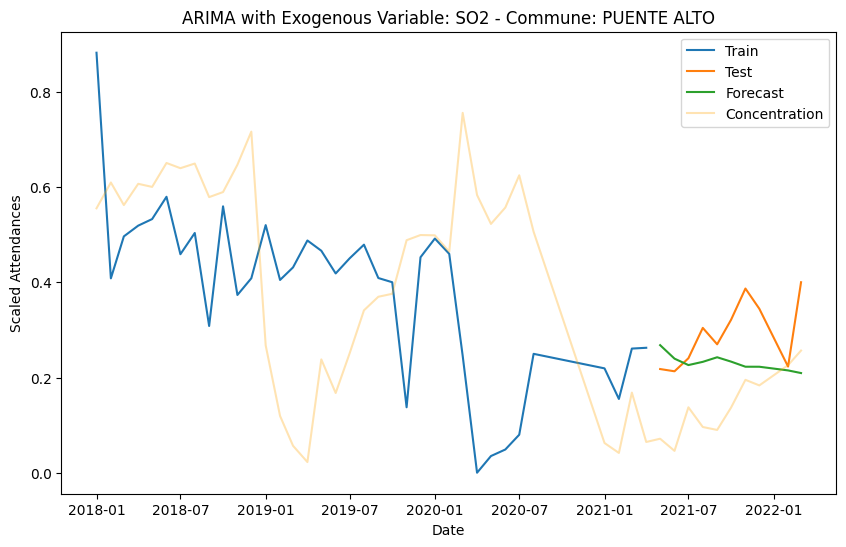

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 0.02200631917263757
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   19
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  35.159
Date:                Thu, 16 Oct 2025   AIC                            -60.317
Time:                        23:29:42   BIC                            -55.866
Sample:                    01-01-2018   HQIC                           -59.704
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0659     46.324     -0.001      0.999     -90.860      90.728
ar.L2          0.0154      3.333      0.005      0.996      -6.517       6.548
ar.L3       

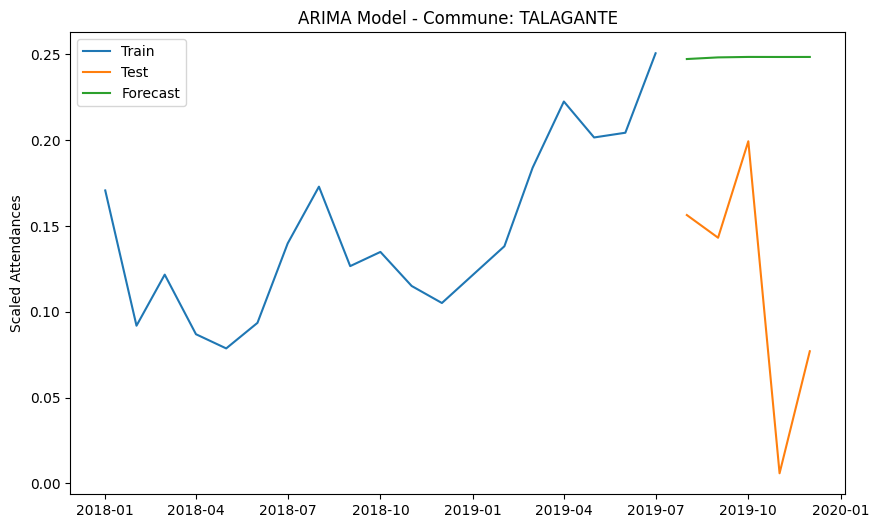

/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/espi/Developer/mental-health-exploration/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 0.020377640044294994
                               SARIMAX Results                                
Dep. Variable:            attendances   No. Observations:                   19
Model:                 ARIMA(3, 1, 1)   Log Likelihood                  35.381
Date:                Thu, 16 Oct 2025   AIC                            -58.762
Time:                        23:29:42   BIC                            -53.420
Sample:                    01-01-2018   HQIC                           -58.026
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
concentration     0.0826      0.210      0.393      0.695      -0.330       0.495
ar.L1            -0.1139     12.496     -0.009      0.993     -24.605      24.377

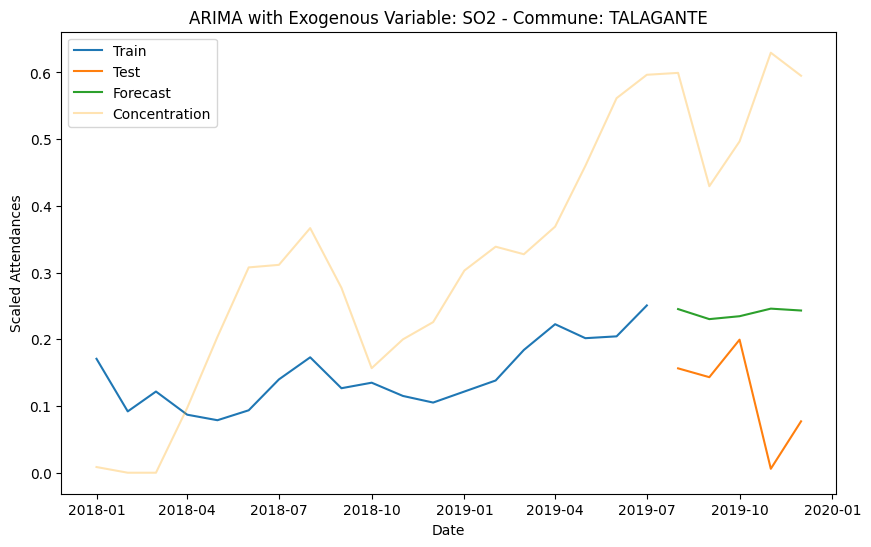

In [5]:
# loop over communes
for commune in data['commune'].unique():
    A = data[data['commune'] == commune]

    A_train, A_test = train_test_split(A, test_size=0.2, shuffle=False)

    # evaluate
    model = ARIMA(A_train['attendances'], order=(3,1,1))
    model_fit = model.fit()
    mse = mean_squared_error(A_test['attendances'], model_fit.forecast(steps=len(A_test)))
    print(f'Mean Squared Error: {mse}')
    print(model_fit.summary())

    # plot
    plt.figure(figsize=(10,6))
    plt.title('ARIMA Model - Commune: ' + commune)
    plt.ylabel('Scaled Attendances')
    plt.plot(A_train.index, A_train['attendances'], label='Train')
    plt.plot(A_test.index, A_test['attendances'], label='Test')
    plt.plot(A_test.index, model_fit.forecast(steps=len(A_test)), label='Forecast')
    plt.legend()
    plt.show()

    # multi-feature ARIMA per commune
    model = ARIMA(A_train['attendances'], exog=A_train[['concentration']], order=(3,1,1))
    model_fit = model.fit()

    # evaluate
    mse = mean_squared_error(A_test['attendances'], model_fit.forecast(steps=len(A_test), exog=A_test[['concentration']]))
    print(f'Mean Squared Error: {mse}')
    print(model_fit.summary())

    # plot
    plt.figure(figsize=(10,6))
    plt.title('ARIMA with Exogenous Variable: SO2 - Commune: ' + commune)
    plt.xlabel('Date')
    plt.ylabel('Scaled Attendances')
    plt.plot(A_train.index, A_train['attendances'], label='Train')
    plt.plot(A_test.index, A_test['attendances'], label='Test')
    # plot train forecast
    plt.plot(A_test.index, model_fit.forecast(steps=len(A_test), exog=A_test[['concentration']]), label='Forecast')
    # plot concentration
    plt.plot(A.index, A['concentration'], label='Concentration', color='orange', alpha=0.3)
    plt.legend()
    plt.show()
